In [1]:
# 3 Observations
#1:Cloudiness  variable is not dependent on latitude.
#2:Windspeed tends to decrease at the equator (by eye, didn't do stat test to see if there was a significant difference between wind speed north and south of equator vs at the equator).
#3: Temperature tends to decrease as latitude increases (Also did not do statistical testing to see if there was a significant difference to support my statement.)


In [15]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sys
import datetime
import requests

import openweathermapy.core as owm
from owm_api import api_key
from citipy import citipy

In [3]:
Random_Locations = pd.DataFrame()
Random_Locations ['Lat_Val'] =[np.random.uniform(-90,90) for x in range(1300)]
Random_Locations ['Lng_Val'] =[np.random.uniform(-180,180) for x in range(1300)]

Random_Locations['City'] = ""
Random_Locations['Country'] = ""
Random_Locations['Temperature'] = ""
Random_Locations['Humidity'] = ""
Random_Locations['Cloudiness'] = ""
Random_Locations['Wind Speed'] = ""
count = 0

for index, row in Random_Locations.iterrows():
    near_city = citipy.nearest_city(row['Lat_Val'], row['Lng_Val']).city_name
    near_country = citipy.nearest_city(row['Lat_Val'], row['Lng_Val']).country_code
    Random_Locations.set_value(index,"City",near_city)
    Random_Locations.set_value(index,"Country",near_country)
    
Random_Locations=Random_Locations.drop_duplicates(['City','Country'],keep = "first")
    
len(Random_Locations)

560

In [4]:
Random_Locations.head(5)

,Lat_Val,Lng_Val,City,Country,Temperature,Humidity,Cloudiness,Wind Speed
0,-86.090338,2.549595,hermanus,za,,,,
1,-75.384644,-129.760236,rikitea,pf,,,,
2,-75.213941,-76.471090,ushuaia,ar,,,,
3,19.304703,-91.565217,sabancuy,mx,,,,
4,56.281463,70.263781,abatskoye,ru,,,,


In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

record = 0
for index, row in Random_Locations.iterrows():
    city_name = row['City']
    country = row['Country']
    query_url = base_url + "appid=" + api_key + "&q=" + city_name + "&units=" + units
    print (query_url)
    try: 
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        Random_Locations.set_value(index,"Temperature", temp)
        Random_Locations.set_value(index,"Humidity",humidity)
        Random_Locations.set_value(index,"Wind Speed", wind)
        Random_Locations.set_value(index,"Cloudiness",cloud)
        print("Retrieved data for %s, %s" % (city_name, country))
    except: 
        print ("The error is ", sys.exc_info()[0])
        print("No data for %s, %s" % (city_name,country))

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hermanus&units=imperial
Retrieved data for hermanus, za
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rikitea&units=imperial
Retrieved data for rikitea, pf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ushuaia&units=imperial
Retrieved data for ushuaia, ar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sabancuy&units=imperial
Retrieved data for sabancuy, mx
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=abatskoye&units=imperial
Retrieved data for abatskoye, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=punta arenas&units=imperial
Retrieved data for punta arenas, cl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint anthony&units=imperial
Retrieved dat

Retrieved data for bambous virieux, mu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pepperell&units=imperial
Retrieved data for pepperell, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yendi&units=imperial
Retrieved data for yendi, gh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vaitupu&units=imperial
The error is  <class 'KeyError'>
No data for vaitupu, wf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=antofagasta&units=imperial
Retrieved data for antofagasta, cl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kysyl-syr&units=imperial
Retrieved data for kysyl-syr, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chokurdakh&units=imperial
Retrieved data for chokurdakh, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e

Retrieved data for polovinnoye, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=marsa matruh&units=imperial
Retrieved data for marsa matruh, eg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=coquimbo&units=imperial
Retrieved data for coquimbo, cl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=upernavik&units=imperial
Retrieved data for upernavik, gl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chuy&units=imperial
Retrieved data for chuy, uy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=illoqqortoormiut&units=imperial
The error is  <class 'KeyError'>
No data for illoqqortoormiut, gl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mahon&units=imperial
Retrieved data for mahon, es
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a119

The error is  <class 'KeyError'>
No data for yuancheng, cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=strelca&units=imperial
The error is  <class 'KeyError'>
No data for strelca, bg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=maragogi&units=imperial
Retrieved data for maragogi, br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kodiak&units=imperial
Retrieved data for kodiak, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mahebourg&units=imperial
Retrieved data for mahebourg, mu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=udachnyy&units=imperial
Retrieved data for udachnyy, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cangzhou&units=imperial
Retrieved data for cangzhou, cn
http://api.openweathermap.org/data/2.5/weather?appid=25

Retrieved data for dingle, ie
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=klaeng&units=imperial
Retrieved data for klaeng, th
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cockburn town&units=imperial
Retrieved data for cockburn town, tc
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vrangel&units=imperial
Retrieved data for vrangel, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=machali&units=imperial
The error is  <class 'KeyError'>
No data for machali, cl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dukat&units=imperial
Retrieved data for dukat, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=manavalakurichi&units=imperial
Retrieved data for manavalakurichi, in
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153

Retrieved data for riyadh, sa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=severo-kurilsk&units=imperial
Retrieved data for severo-kurilsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=viligili&units=imperial
The error is  <class 'KeyError'>
No data for viligili, mv
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=touros&units=imperial
Retrieved data for touros, br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bilma&units=imperial
Retrieved data for bilma, ne
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=qaqortoq&units=imperial
Retrieved data for qaqortoq, gl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sokoni&units=imperial
Retrieved data for sokoni, tz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc

Retrieved data for sinegorskiy, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tonj&units=imperial
The error is  <class 'KeyError'>
No data for tonj, sd
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nguiu&units=imperial
The error is  <class 'KeyError'>
No data for nguiu, au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=wagga wagga&units=imperial
Retrieved data for wagga wagga, au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=alghero&units=imperial
Retrieved data for alghero, it
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san patricio&units=imperial
Retrieved data for san patricio, mx
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=meulaboh&units=imperial
Retrieved data for meulaboh, id
http://api.openweathermap.org/data/2.5/weather?appi

Retrieved data for khatanga, ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yamada&units=imperial
Retrieved data for yamada, jp
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=wahran&units=imperial
The error is  <class 'KeyError'>
No data for wahran, dz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=blairmore&units=imperial
Retrieved data for blairmore, ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chaves&units=imperial
Retrieved data for chaves, pt
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=shushtar&units=imperial
Retrieved data for shushtar, ir
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=baruun-urt&units=imperial
Retrieved data for baruun-urt, mn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9e

Retrieved data for high level, ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mutsamudu&units=imperial
The error is  <class 'KeyError'>
No data for mutsamudu, km
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cap malheureux&units=imperial
Retrieved data for cap malheureux, mu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nizwa&units=imperial
Retrieved data for nizwa, om
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=miles city&units=imperial
Retrieved data for miles city, us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=barawe&units=imperial
The error is  <class 'KeyError'>
No data for barawe, so
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san blas&units=imperial
Retrieved data for san blas, mx
http://api.openweathermap.org/data/2.5/wea

Retrieved data for oranjemund, na
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tyup&units=imperial
Retrieved data for tyup, kg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=papetoai&units=imperial
Retrieved data for papetoai, pf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pontianak&units=imperial
Retrieved data for pontianak, id
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nagato&units=imperial
Retrieved data for nagato, jp
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=penzance&units=imperial
Retrieved data for penzance, gb
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san cristobal&units=imperial
Retrieved data for san cristobal, ec
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=arman&units=im

Retrieved data for mancora, pe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pucallpa&units=imperial
Retrieved data for pucallpa, pe


In [6]:
Random_Locations.head(5)

,Lat_Val,Lng_Val,City,Country,Temperature,Humidity,Cloudiness,Wind Speed
0,-86.090338,2.549595,hermanus,za,52.56,89,0,4.41
1,-75.384644,-129.760236,rikitea,pf,80.05,100,92,13.35
2,-75.213941,-76.471090,ushuaia,ar,41,86,90,14.99
3,19.304703,-91.565217,sabancuy,mx,84.24,81,0,9.22
4,56.281463,70.263781,abatskoye,ru,29.38,92,88,12.57


In [7]:
Random_Locations.to_csv("Hw6_data.csv", encoding="utf-8", index=False)

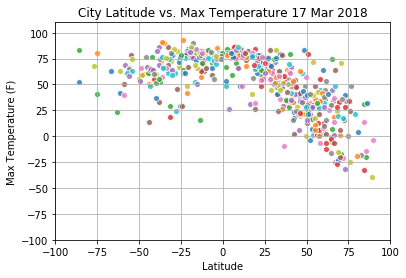

In [32]:
#Temperature VS LAT

for index, row in Random_Locations.iterrows():
    lat_val = Random_Locations.get_value(index, "Lat_Val")
    temp = Random_Locations.get_value(index, "Temperature")
    if (temp != ""): #some cities don't exist in openweather -sadface-
        plt.scatter(lat_val, temp, edgecolor="white", linewidths=1, marker="o",alpha=0.8, label="Cities")

now = datetime.datetime.now()
month = now.strftime("%b")
plt.title(f"City Latitude vs. Max Temperature {now.day} {month} {now.year}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100,100)
plt.ylim(-100,110)

plt.savefig("LattemoPlt.png")
plt.show()

### its not blue like in the example but I like this better.

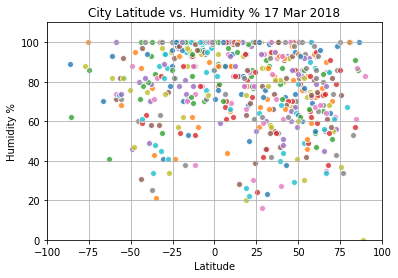

In [33]:
#Humidity VS LAT
for index, row in Random_Locations.iterrows():
    lat_val = Random_Locations.get_value(index, "Lat_Val")
    humidity = Random_Locations.get_value(index, "Humidity")
    if (humidity != ""): #some cities don't exist in openweather -sadface-
        plt.scatter(lat_val, humidity, edgecolor="white", linewidths=1, marker="o",alpha=0.8, label="Cities")

now = datetime.datetime.now()
month = now.strftime("%b")
plt.title(f"City Latitude vs. Humidity % {now.day} {month} {now.year}")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100,100)
plt.ylim(0,110)

plt.savefig("LathumidPlt.png")
plt.show()

### its not blue like in the example but I like this better.

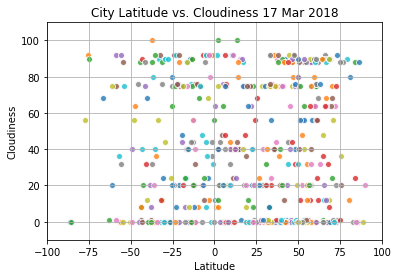

In [29]:
#lat vs cloudiness plot
for index, row in Random_Locations.iterrows():
    lat_val = Random_Locations.get_value(index, "Lat_Val")
    cloud = Random_Locations.get_value(index, "Cloudiness")
    if (cloud != ""): #some cities don't exist in openweather -sadface-
        plt.scatter(lat_val, cloud, edgecolor="white", linewidths=1, marker="o",alpha=0.8, label="Cities")

now = datetime.datetime.now()
month = now.strftime("%b")
plt.title(f"City Latitude vs. Cloudiness {now.day} {month} {now.year}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100,100)
plt.ylim(-10,110)

plt.savefig("LatcloudPlt.png")
plt.show()

### its not blue like in the example but I like this better

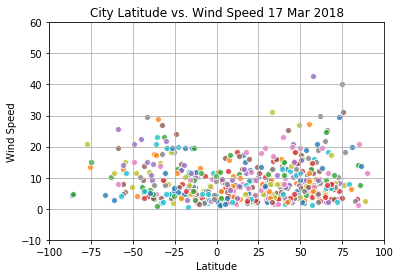

In [31]:
#lat vs windspeed plot
for index, row in Random_Locations.iterrows():
    lat_val = Random_Locations.get_value(index, "Lat_Val")
    wind = Random_Locations.get_value(index, "Wind Speed")
    if (wind != ""): #some cities don't exist in openweather -sadface-
        plt.scatter(lat_val, wind, edgecolor="white", linewidths=1, marker="o",alpha=0.8, label="Cities")

now = datetime.datetime.now()
month = now.strftime("%b")
plt.title(f"City Latitude vs. Wind Speed {now.day} {month} {now.year}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-100,100)
plt.ylim(-10,60)

plt.savefig("LatwindPlt.png")
plt.show()

### its not blue like in the example but I like this better